In [0]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144
from collections import Counter
import pandas as pd
import re
import requests
#import dill
from bs4 import BeautifulSoup
from datetime import datetime
#plt.tight_layout()

There is one website with stored and clean H1B data. https://h1bdata.info/index.php

We can use this website and get the H1B information. First use beautiful soup. Save the data to local. I start from one page. Google 2018 H1B cases.

In [4]:
page = requests.get('https://h1bdata.info/index.php?em=Google&year=2018') # Use requests.get to download the page.
soup = BeautifulSoup(page.text, "lxml")
table = soup.find_all('table')[0]
#print(table)

df = pd.read_html(str(table))[0]
print(df.head())

     EMPLOYER                        JOB TITLE  BASE SALARY  \
0  GOOGLE LLC                       1615.29860       115000   
1  GOOGLE LLC                     1615.42253.1       155000   
2  GOOGLE LLC       ACCOUNT MANAGER 1615.10639        77500   
3  GOOGLE LLC       ACCOUNT MANAGER 1615.33731        75500   
4  GOOGLE LLC  ACCOUNT STRATEGIST ( 1615.5050)        92000   

            LOCATION SUBMIT DATE  START DATE CASE STATUS  
0       KIRKLAND, WA  01/26/2018  07/25/2018   WITHDRAWN  
1      SUNNYVALE, CA  11/05/2018  11/15/2018      DENIED  
2      ANN ARBOR, MI  02/16/2018  07/30/2018   CERTIFIED  
3        CHICAGO, IL  02/07/2018  08/03/2018   CERTIFIED  
4  MOUNTAIN VIEW, CA  02/02/2018  07/30/2018   CERTIFIED  


save the df file to local. Optional. 

In [0]:
df.to_pickle('google_2018')

In [0]:
df = pd.read_pickle('google_2018') #read from local

     EMPLOYER                        JOB TITLE  BASE SALARY  \
0  GOOGLE LLC                       1615.29860       115000   
1  GOOGLE LLC                     1615.42253.1       155000   
2  GOOGLE LLC       ACCOUNT MANAGER 1615.10639        77500   
3  GOOGLE LLC       ACCOUNT MANAGER 1615.33731        75500   
4  GOOGLE LLC  ACCOUNT STRATEGIST ( 1615.5050)        92000   

            LOCATION SUBMIT DATE  START DATE CASE STATUS  
0       KIRKLAND, WA  01/26/2018  07/25/2018   WITHDRAWN  
1      SUNNYVALE, CA  11/05/2018  11/15/2018      DENIED  
2      ANN ARBOR, MI  02/16/2018  07/30/2018   CERTIFIED  
3        CHICAGO, IL  02/07/2018  08/03/2018   CERTIFIED  
4  MOUNTAIN VIEW, CA  02/02/2018  07/30/2018   CERTIFIED  
0         KIRKLAND, WA
1        SUNNYVALE, CA
2        ANN ARBOR, MI
3          CHICAGO, IL
4    MOUNTAIN VIEW, CA
Name: LOCATION, dtype: object


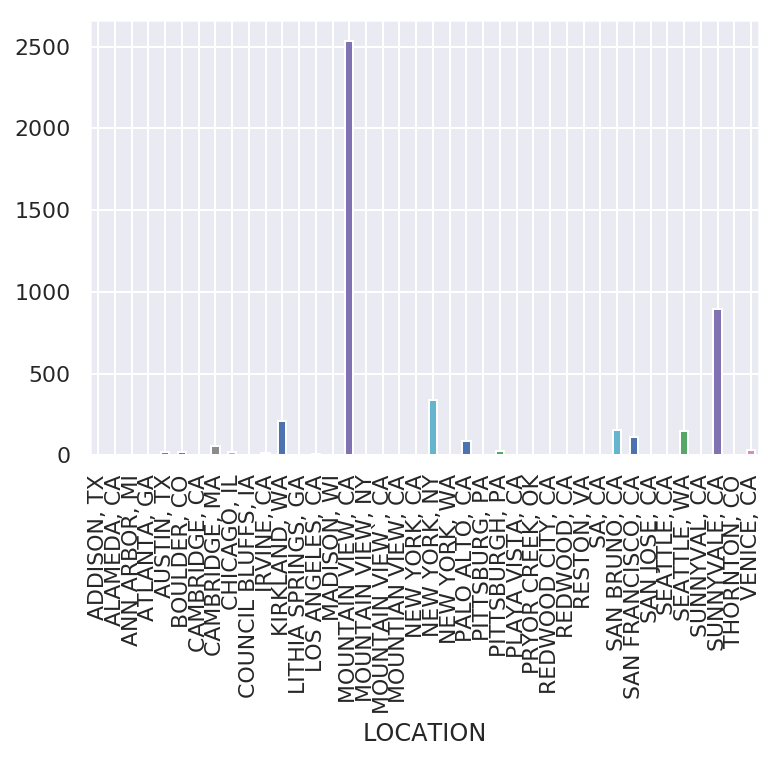

In [6]:
# test with one figure. The number of H1B filed and location. 
print(df.head())
print(df['LOCATION'][0:5])

df.groupby('LOCATION')['JOB TITLE'].nunique().plot(kind='bar')

plt.savefig('LOCATION_TEST1.jpg',dpi=200, bbox_inches="tight")

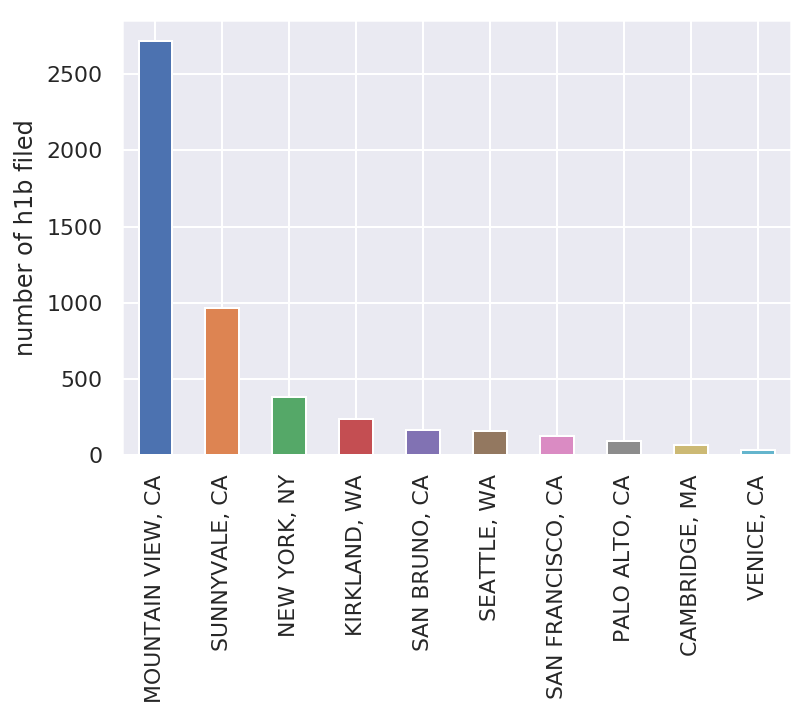

In [7]:
# We can plot the top 10 cities
df['LOCATION'].value_counts()[:10].plot(kind='bar')
plt.ylabel('number of h1b filed')
plt.show()

We can use pandas groupby method to get different aggregation plots. (https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html). We can sort by the aggreation number and plot the graph.

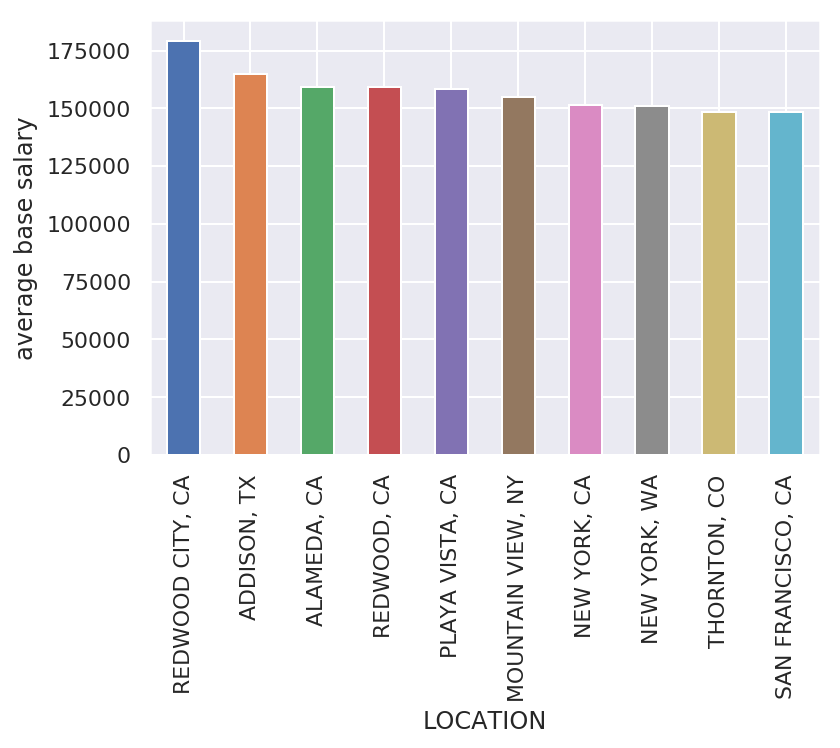

In [8]:
# plot the mean base salary vs. location, top 10
grp_location =df.groupby('LOCATION')  # group by location
grp_location['BASE SALARY'].mean().sort_values(ascending=False)[:10].plot(kind='bar') #mean and sort. get top 10. 
plt.ylabel('average base salary')
plt.show()

In [9]:
df.head()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS
0,GOOGLE LLC,1615.29860,115000,"KIRKLAND, WA",01/26/2018,07/25/2018,WITHDRAWN
1,GOOGLE LLC,1615.42253.1,155000,"SUNNYVALE, CA",11/05/2018,11/15/2018,DENIED
2,GOOGLE LLC,ACCOUNT MANAGER 1615.10639,77500,"ANN ARBOR, MI",02/16/2018,07/30/2018,CERTIFIED
3,GOOGLE LLC,ACCOUNT MANAGER 1615.33731,75500,"CHICAGO, IL",02/07/2018,08/03/2018,CERTIFIED
4,GOOGLE LLC,ACCOUNT STRATEGIST ( 1615.5050),92000,"MOUNTAIN VIEW, CA",02/02/2018,07/30/2018,CERTIFIED


We can clean the JOB TITLE name and create one more coloumn as the real JOB TITLE ('JOB TITLE CLEAR'). Plot this JOB TITLE CLEAR, we can know how many H1B filed based on the job function.

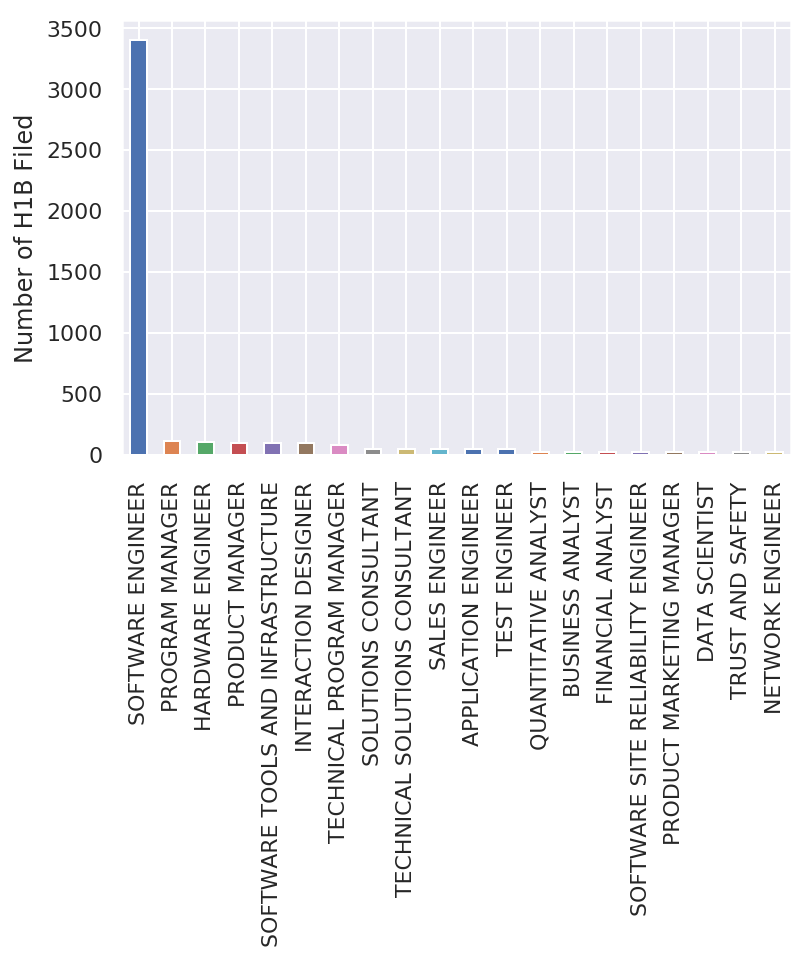

In [10]:
def JOBTITLE_helper(title):
    t = title.split(' ')
    res = []
    for s in t:
        if s.isalpha():
            res.append(s)
    ans = ''
    for r in res:
        ans +=r
        ans +=' '
    return(ans)

df['JOB TITLE CLEAR'] = df.apply(lambda f: JOBTITLE_helper(f['JOB TITLE']), axis=1)

df['JOB TITLE CLEAR'].value_counts()[:20].plot(kind = 'bar')
plt.ylabel('Number of H1B Filed')
plt.show()
    

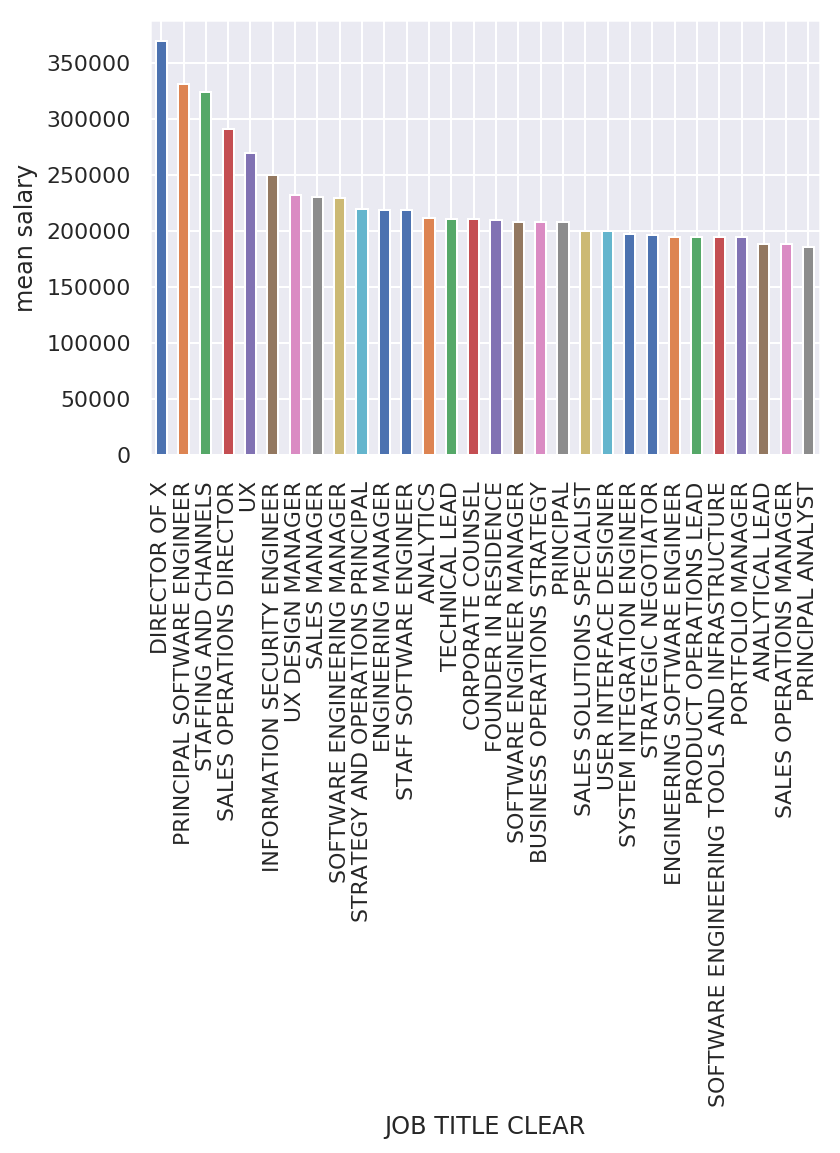

In [11]:
grp_jobtitleclear =df.groupby('JOB TITLE CLEAR') 
grp_jobtitleclear['BASE SALARY'].mean().sort_values(ascending = False)[:30].plot(kind = 'bar')
plt.ylabel('mean salary')
plt.show()
    

We can check the mean salary by interest. 

In [0]:
jobs_to_check = ['SOFTWARE ENGINEER ','HARDWARE ENGINEER ', 'DATA SCIENTIST ', 'PROGRAM MANAGER ']  # modify the title you want to check. remember to add one space at the end ' '  --> becasue of the function 

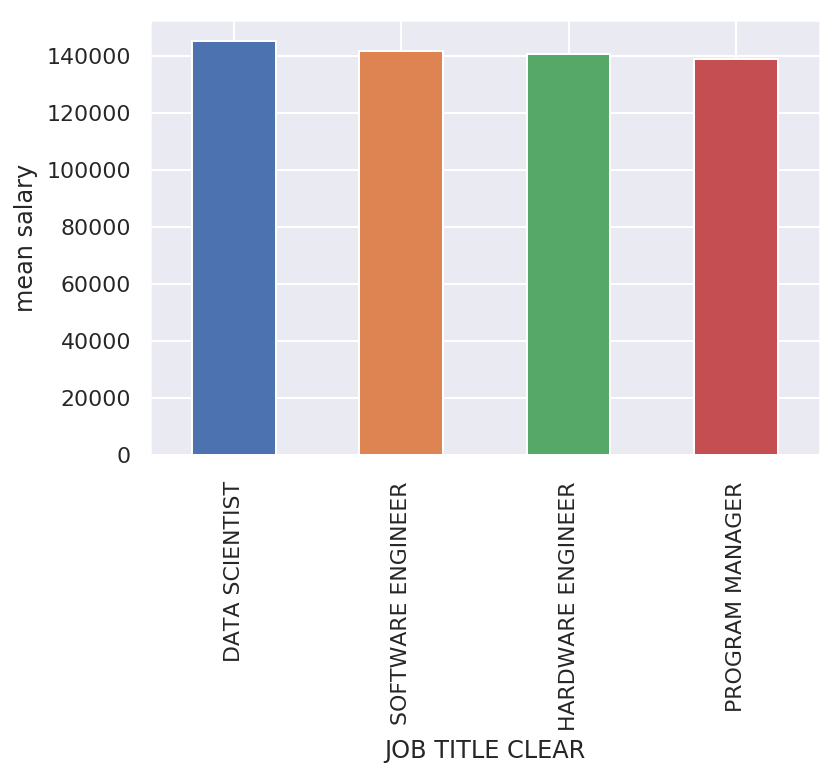

In [13]:

df_tocheck = df.loc[df['JOB TITLE CLEAR'].isin(jobs_to_check)]
df_tocheck.groupby('JOB TITLE CLEAR')['BASE SALARY'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('mean salary')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


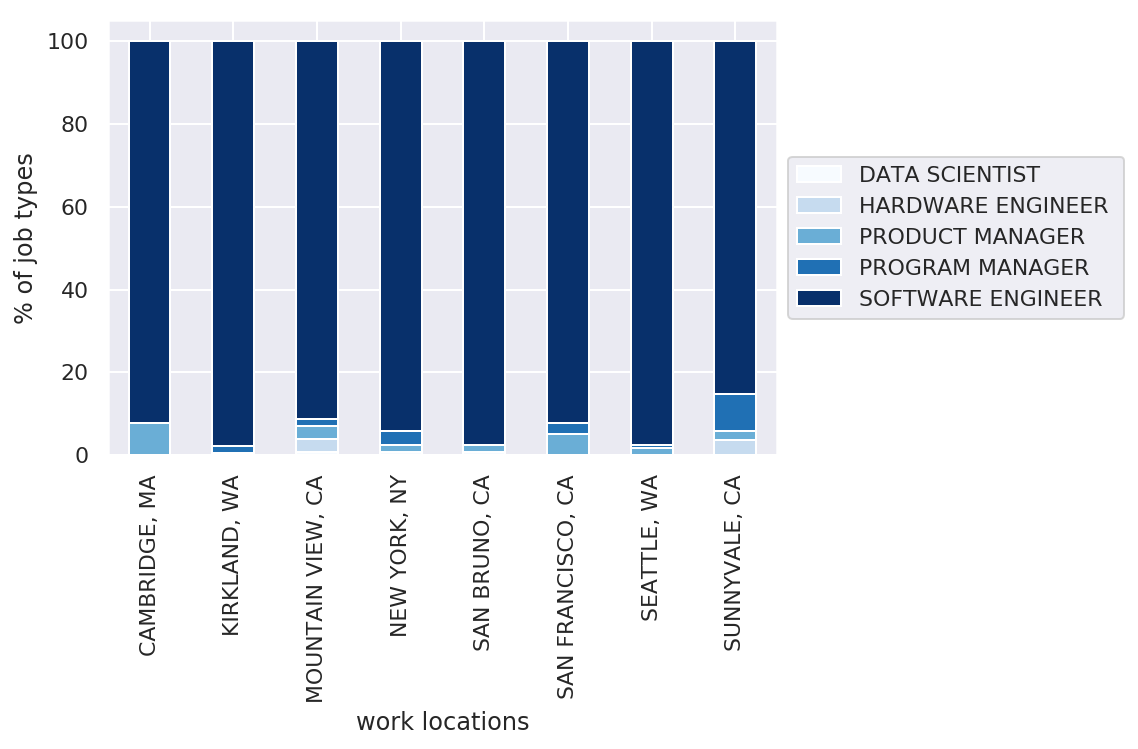

In [15]:
locations_to_check = ['MOUNTAIN VIEW, CA', 'SUNNYVALE, CA', 'NEW YORK, NY','KIRKLAND, WA','SAN BRUNO, CA', 'SEATTLE, WA', 'SAN FRANCISCO, CA','PALO ALOTO, CA','CAMBRIDGE, MA']
jobs_to_check_2 = ['SOFTWARE ENGINEER ','HARDWARE ENGINEER ', 'DATA SCIENTIST ', 'PROGRAM MANAGER ','PRODUCT MANAGER ']
df_locationstocheck = df.loc[df['LOCATION'].isin(locations_to_check)][df['JOB TITLE CLEAR'].isin(jobs_to_check_2)]

df_locationstocheck.groupby(['LOCATION','JOB TITLE CLEAR']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',colormap='Blues',stacked=True)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('% of job types')
plt.xlabel('work locations')
plt.show()